In [35]:
import os
import argparse
import glob
import time
import cv2
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from PIL import Image

In [3]:
def get_closestBS(y, y_space):
    if y < y_space[0] or y > y_space[-1]: # if y out of bounds of image return None
        return None
    
    low = 0
    high = len(y_space) - 1
    middle = int((low + high) / 2)
    while (low <= high):
        middle = int((low + high) / 2)
        _min = abs(y_space[middle] - y)
        
        if middle - 1 >= 0 and middle + 1 <= len(y_space) - 1:
            if abs(y_space[middle - 1] - y) < _min: # left case
                high = middle - 1
            
            elif abs(y_space[middle + 1] - y) < _min: # right case
                low = middle + 1
        
            else:
                return middle
            
        elif middle - 1 >= 0:
            if abs(y_space[middle - 1] - y) < _min: # left case
                high = middle - 1
            
            else:
                return middle
            
        elif middle + 1 <= len(y_space) - 1:
            if abs(y_space[middle + 1] - y) < _min: # right case
                low = middle + 1
        
            else:
                return middle
            
    return middle

In [4]:
def make_img(min_x, max_x, min_y, max_y, x_pixels, function):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space)), dtype=np.float32)
    
    for index, x in enumerate(x_space):
        y = function(x)
        closest = get_closestBS(y, y_space)
        if closest != None:
            y_index = len(y_space) - (1 + closest)
            img[y_index][index] = 255
    
    return img

## Making animations of graphs
___

In [5]:
import moviepy.editor as mvpy

In [6]:
def FunctionList(min_x, max_x, min_y, max_y, x_pixels, function, mod=1, width=1):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space)), dtype=np.int32)
    
    order = [] # list to keep track of order of images in the video we will create
    x_prev = None
    y_prev = None
    x_space_len = len(x_space)-1
    for index, x in enumerate(x_space):
        y = function(x) 
    
        if (index != 0) and (index!=x_space_len):
            closest = get_closestBS(y, y_space)
            closest_prev = get_closestBS(y_prev, y_space)
            if closest!=None and closest_prev!=None:
                y_index = len(y_space) - (1 + closest)
                y_index_prev = len(y_space) - (1 + closest_prev)
                cv2.line(img, (index-1, y_index_prev), (index, y_index), (255, 255, 255))
        
        if (index % mod) == 0: # take img every mod pixels
            cv2.imwrite("./data/img-{}.jpg".format(index), np.dstack([img, img, img])) # write image to folder
            order.append("./data/img-{}.jpg".format(index)) # add image name to order list
        
        x_prev = x
        y_prev = y
    
    return order

def FunctionListDotted(min_x, max_x, min_y, max_y, x_pixels, function, mod=1, width=1):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space)), dtype=np.int32)
    
    order = [] # list to keep track of order of images in the video we will create
    for index, x in enumerate(x_space):
        if (index % mod) == 0: # take img every mod pixels
            y = function(x) 
            y_index = len(y_space) - (1 + get_closest(y, y_space))
            bottom = y_index - width
            top = y_index + width
            if bottom < 0:
                bottom = 0
            if top > img.shape[0]:
                top = img.shape[0]
            img[bottom:top, index] = 255
            cv2.imwrite("./data/img-{}.jpg".format(index), np.dstack([img, img, img])) # write image to folder
            order.append("./data/img-{}.jpg".format(index)) # add image name to order list
    
    return order

def makeGraphAnimation(min_x, max_x, min_y, max_y, x_pixels, function, fps, fname, mod, width):
    d = []
    order = FunctionList(min_x, max_x, min_y, max_y, x_pixels, function, mod, width)
        
    clip = mvpy.ImageSequenceClip(order, fps=fps) # make clip object
    clip.write_videofile(fname, fps=fps) # write it to disk
    
def emptyDir(pathToDir, fileType="*"):
    for path in glob.glob("{}/{}".format(pathToDir, fileType)):
        os.unlink(path)

In [61]:
def makeGraphAnimation_multi(min_x, max_x, min_y, max_y, x_pixels, function, fps, fname, mod, width, color):
    d = []
    order = FunctionList_multi(min_x, max_x, min_y, max_y, x_pixels, function, mod, width, color)
        
    clip = mvpy.ImageSequenceClip(order, fps=fps) # make clip object
    clip.write_videofile(fname, fps=fps) # write it to disk
    
def FunctionList_multi(min_x, max_x, min_y, max_y, x_pixels, function, mod, width, color):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space), 3), dtype=np.int32)
    
    order = [] # list to keep track of order of images in the video we will create
    x_prev = np.zeros(len(color))
    y_prev = np.zeros(len(color))
    x_space_len = len(x_space)-1
    for index, x in enumerate(x_space):
        for index2, tup in enumerate(zip(function, color)):
            function_, color_ = tup
            y = function_(x) 

            if (index != 0) and (index!=x_space_len):
                closest = get_closestBS(y, y_space)
                closest_prev = get_closestBS(y_prev[index2], y_space)
                if closest!=None and closest_prev!=None:
                    y_index = len(y_space) - (1 + closest)
                    y_index_prev = len(y_space) - (1 + closest_prev)
                    cv2.line(img, (index-1, y_index_prev), (index, y_index), color_)

            if (index % mod) == 0: # take img every mod pixels
                cv2.imwrite("./data/img-{}.jpg".format(index), img) # write image to folder
                order.append("./data/img-{}.jpg".format(index)) # add image name to order list

            x_prev[index2] = x
            y_prev[index2] = y
    
    return order

In [47]:
makeGraphAnimation_multi(-2, 2, -1.1, 1.1, 3000, [lambda x: np.sin(x), lambda x: np.cos(x)], 100, "doublewave.mp4", [(40, 130, 255), (255, 130, 40)], 1, 0)

Moviepy - Building video doublewave.mp4.
Moviepy - Writing video doublewave.mp4



Moviepy - Done !
Moviepy - video ready doublewave.mp4


## Making animations of parametric functions
___

In [8]:
def getX(radius, angle):
    return np.cos(angle)*radius

def getY(radius, angle):
    return np.sin(angle)*radius

def timeImageMakerPolar(width, height, radius_function, angle_function, time, fps, mod):
    img = np.zeros((width, height), dtype=np.int32)
    order = []
    
    frames = int(fps*time)
    t_space = np.linspace(0, time, frames)
    center_x = int(width/2)
    center_y = int(height/2)
    prev_x, prev_y = None, None
    for index, t in enumerate(t_space):
        r_t = radius_function(t)
        a_t = angle_function(t)
        x_t = getX(r_t, a_t)
        y_t = getY(r_t, a_t)
        if prev_x != None and prev_y != None and (index % mod) == 0:
            cv2.line(img, (int(prev_x + center_x), int(prev_y + center_y)), (int(x_t + center_x), int(y_t + center_y)), (255, 255, 255))
            cv2.imwrite("./data/img-{}.jpg".format(index), np.dstack([img, img, img]))
            order.append("./data/img-{}.jpg".format(index))
        prev_x = x_t
        prev_y = y_t
    
    return order

def timeImageMakerCart(width, height, X_function, Y_function, time, fps, mod):
    img = np.zeros((width, height), dtype=np.int32)
    order = []
    
    frames = int(fps*time)
    t_space = np.linspace(0, time, frames)
    center_x = int(width/2)
    center_y = int(height/2)
    prev_x, prev_y = None, None
    for index, t in enumerate(t_space):
        x_t = X_function(t)
        y_t = Y_function(t)
        if prev_x != None and prev_y != None and (index % mod) == 0:
            cv2.line(img, (int(prev_x + center_x), int(prev_y + center_y)), (int(x_t + center_x), int(y_t + center_y)), (255, 255, 255))
            cv2.imwrite("./data/img-{}.jpg".format(index), np.dstack([img, img, img]))
            order.append("./data/img-{}.jpg".format(index))
        prev_x = x_t
        prev_y = y_t
    
    return order

def timeImageMakerFourier(width, height, radius_function, T, time, fps, mod):
    img = np.zeros((width, height), dtype=np.int32)
    order = []
    
    frames = int(fps*time)
    t_space = np.linspace(0, time, frames)
    center_x = int(width/2)
    center_y = int(height/2)
    prev_x, prev_y = None, None
    for index, t in enumerate(t_space):
        r_t = radius_function(t)
        a_t = 2*t*np.pi/T
        x_t = getX(r_t, a_t)
        y_t = getY(r_t, a_t)
        if prev_x != None and prev_y != None and (index % mod) == 0:
            cv2.line(img, (int(prev_x + center_x), int(prev_y + center_y)), (int(x_t + center_x), int(y_t + center_y)), (255, 255, 255))
            cv2.imwrite("./data/img-{}.jpg".format(index), np.dstack([img, img, img]))
            order.append("./data/img-{}.jpg".format(index))
        prev_x = x_t
        prev_y = y_t
    
    return order
    
def timeAnimation(width, height, radius_function, angle_function, time, fps, mod, fname):
    #order = timeImageMaker(width, height, radius_function, angle_function, time, fps, mod)
    order = timeImageMakerFourier(width, height, radius_function, 2.3, time, fps, mod)
    
    clip = mvpy.ImageSequenceClip(order, fps=fps)

    clip.write_videofile(fname, fps=fps)

In [27]:
timeAnimation(1000, 1000, lambda x: 350*np.sin(x)*np.cos(3*x -4), lambda x: x*0.6, 30, 150, 1, "fourier.mp4")

Moviepy - Building video fourier.mp4.
Moviepy - Writing video fourier.mp4



Moviepy - Done !
Moviepy - video ready fourier.mp4


## Making animations of functions with a single parameter
___

In [9]:
def FunctionChange(min_x, max_x, min_y, max_y, x_pixels, function, p_min, p_max, fps, time, color):
    order = []
    p_space = np.linspace(p_min, p_max, int(time*fps))
    for index, p in enumerate(p_space):
        make_img_param(min_x, max_x, min_y, max_y, x_pixels, function, p, index, color)
        order.append("./data/img-{}.jpg".format(index))
        
    return order

def Panimation(min_x, max_x, min_y, max_y, x_pixels, function, p_min, p_max, fps, fname, time, color=(255, 255, 255)):
    order = FunctionChange(min_x, max_x, min_y, max_y, x_pixels, function, p_min, p_max, fps, time, color)
    
    clip = mvpy.ImageSequenceClip(order, fps=fps)
    clip.write_videofile(fname, fps=fps)
    
    return clip

In [10]:
def make_img_param(min_x, max_x, min_y, max_y, x_pixels, function, parameter, i, color):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space), 3), dtype=np.int32)
    prev_x, prev_y = None, None
    for index, x in enumerate(x_space):
        y = function(parameter, x)
        if (index != 0) and (index!=len(x_space)-1):
                closest = get_closestBS(y, y_space)
                closest_prev = get_closestBS(prev_y, y_space)
                if closest!=None and closest_prev!=None:
                    y_index = len(y_space) - (1 + closest)
                    y_index_prev = len(y_space) - (1 + closest_prev)
                    cv2.line(img, (index-1, y_index_prev), (index, y_index), color)
        prev_x = x
        prev_y = y
        
    cv2.imwrite("./data/img-{}.jpg".format(i), img)
    
def make_img_param_multi(min_x, max_x, min_y, max_y, x_pixels, function, parameter, i, color):
    assert len(function) == len(color)
    
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space), 3), dtype=np.int32)
    prev_x, prev_y = np.zeros(len(color)), np.zeros(len(color))
    for index, x in enumerate(x_space):
        for index2, tup in enumerate(zip(function, color)):
            function_, color_ = tup
            y = function_(parameter, x)
            if (index != 0) and (index!=len(x_space)-1):
                    closest = get_closestBS(y, y_space)
                    closest_prev = get_closestBS(prev_y[index2], y_space)
                    if closest!=None and closest_prev!=None:
                        y_index = len(y_space) - (1 + closest)
                        y_index_prev = len(y_space) - (1 + closest_prev)
                        cv2.line(img, (index-1, y_index_prev), (index, y_index), color_)
            prev_x[index2] = x
            prev_y[index2] = y
        
    cv2.imwrite("./data/img-{}.jpg".format(i), img)

In [11]:
def FunctionChange_multi(min_x, max_x, min_y, max_y, x_pixels, function, p_min, p_max, fps, time, color):
    order = []
    p_space = np.linspace(p_min, p_max, int(time*fps))
    for index, p in enumerate(p_space):
        make_img_param_multi(min_x, max_x, min_y, max_y, x_pixels, function, p, index, color)
        order.append("./data/img-{}.jpg".format(index))
        
    return order

def Panimation_multi(min_x, max_x, min_y, max_y, x_pixels, function, p_min, p_max, fps, fname, time, color=(255, 255, 255)):
    order = FunctionChange_multi(min_x, max_x, min_y, max_y, x_pixels, function, p_min, p_max, fps, time, color)
    
    clip = mvpy.ImageSequenceClip(order, fps=fps)
    clip.write_videofile(fname, fps=fps)
    
    return clip

In [38]:
clip = Panimation_multi(-6, 6, -6, 6, 1500, [lambda p, x: np.sin(p*x), lambda p, x: np.cos(p*x)], -5, 5, 150, "parameter3.mp4", 4, [(40, 130, 255), (255, 130, 40)])

Moviepy - Building video parameter3.mp4.
Moviepy - Writing video parameter3.mp4



Moviepy - Done !
Moviepy - video ready parameter3.mp4


## Polynomial class 
___
Represents a function, supports basic derivative operations. A polynomial object  $Z$ can be used in the lambda expression as a function in the following manner: `lambda x:`  $Z$`[x]`

In [64]:
class Polynomial:
    powers = {}
    
    def __init__(self, powers_):
        self.powers = powers_
        
    def AddPower(self, n, val):
        if n in powers.keys():
            self.powers[n] += val
        else:
            self.powers[n] = val
            
    def SetPower(self, n, val):
        self.powers[n] = val
        
    def getPower(self):
        return self.powers
        
    def getPowerAt(self, n):
        return self.powers[n]
    
    def GetDerivative(self):
        der = Polynomial({})
        for key in self.powers.keys():
            if key != 0:
                if type(self.powers[key]) != type(self):
                    der.SetPower(key - 1, key*self.powers[key])
                else:
                    der.SetPower(key - 1, key*self.powers[key]*self.powers[key].GetDerivative())
                
        return der
    
    def __mul__(self, other):
        t = type(other)
        assert t == int or t == float or t == type(self), "Multiplication for this type is not supported"
        if t == int or t == float:
            for key in self.powers.keys():
                self.powers[key] *= other
        else:
            pass
        
    def __rmul__(self, other):
        return __mul__(other)
    
    def __getitem__(self, x):
        sum_ = 0
        for key in self.powers.keys():
            sum_ += self.powers[key]*x**key
        return sum_
    
    def __str__(self):
        toReturn = ""
        ordered = sorted(self.powers.keys())
        length = len(ordered)
        for i in range(length):
            key = ordered[length - (i + 1)]
            if i == 0:
                toReturn += str(self.powers[key]) + "x^" + str(key)
            else:
                toReturn += " + " + str(self.powers[key]) + "x^" + str(key)
                
        return toReturn

In [37]:
class MulPolynomial:
    polynomial1 = None
    polynomial2 = None
    def __init__(self, poly1, poly2):
        self.polynomial1 = poly1
        self.polynomial2 = poly2
        
    def __getitem__(self, x):
        return self.polynomial1[x] * self.polynomial2[x]
    
    def GetDerivative(self):
        der1 = self.polynomial1.GetDerivative()
        der2 = self.polynomial2.GetDerivative()
        mul1 = MulPolynomial(self.polynomial1, der2)
        mul2 = MulPolynomial(self.polynomial2, der1)
        der = AddPolynomial(mul1, mul2)
        
        return der

In [38]:
class AddPolynomial:
    polynomial1 = None
    polynomial2 = None
    def __init__(self, poly1, poly2):
        self.polynomial1 = poly1
        self.polynomial2 = poly2
        
    def __getitem__(self, x):
        return self.polynomial1[x] + self.polynomial2[x]
    
    def GetDerivative(self):
        der1 = self.polynomial1.GetDerivative()
        der2 = self.polynomial2.GetDerivative()
        der = AddPolynomial(der1, der2)
        
        return der

In [62]:
makeGraphAnimation_multi(-2, 2, -4, 4, 1000, [lambda x: c[x], lambda x: d[x]], 150, "polytest.mp4", 1, 0, [(40, 130, 255), (255, 130, 40)])

Moviepy - Building video polytest.mp4.
Moviepy - Writing video polytest.mp4



Moviepy - Done !
Moviepy - video ready polytest.mp4


In [63]:
a = Polynomial({2: 4, 1: 1})
b = Polynomial({3: 2, 2: a})

c = MulPolynomial(a, b)
d = c.GetDerivative()

In [53]:
w = np.zeros((10, 10, 3), dtype=np.int32)

In [56]:
w[:5, :5, :] = [255, 130, 40]

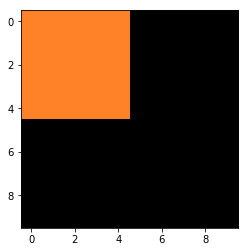

In [57]:
plt.imshow(w)